In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [10]:
df = pd.read_csv(r"..\weird_fiction_visualizations\gephi_edges.csv")
df = df.dropna()
df['target'] = df['target'].astype('int')

In [11]:
fig = px.scatter(df, x='source', y='target', color='semester')
fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['source'], y=df['target'], mode='markers', name='markers'))
fig.add_trace(go.Scatter(x=df['source'], y=df['target'], mode='lines+markers', name='lines+markers'))
fig.show()


In [12]:
color_dictionary = {'Fall 2019': 'red', 'Fall 2020': 'blue', 'Fall 2021': 'green', 'Spring 2020': 'mediumorchid', 'Spring 2021': 'gold', 'Spring 2022': 'magenta', 'Summer 2020': 'brown', 'Summer 2021': 'purple'}

df['color'] = df['semester'].map(color_dictionary)
print(df.head())
print(df.tail())

   source  target   semester  week_read  color
0     324     342  Fall 2021       15.0  green
1     347     320  Fall 2021       15.0  green
2     342     339  Fall 2021       15.0  green
3     346     339  Fall 2021       15.0  green
4     329     337  Fall 2021       15.0  green
      source  target     semester  week_read    color
7842     362      85  Spring 2022       15.0  magenta
7843     362     108  Spring 2022       15.0  magenta
7844     381      35  Spring 2022       15.0  magenta
7845     381      36  Spring 2022       15.0  magenta
7846     381      90  Spring 2022       15.0  magenta


In [18]:
import networkx as nx
G = nx.from_pandas_edgelist(df, source='source', target='target', create_using=nx.DiGraph)
colors = []

for index, row in df.iterrows():
    colors.append(row['color'])

print(colors)

['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 

In [25]:
val_map = dict(zip(df.source, df.target))

In [26]:
values = [val_map.get(node, 0.25) for node in G.nodes]

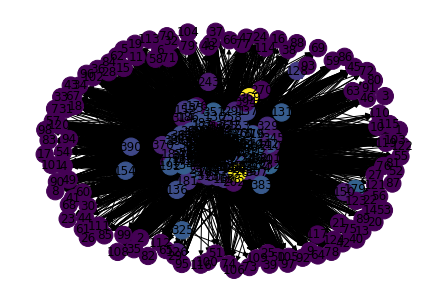

In [28]:
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color = values, with_labels=True)